Imports: 
following imports and additional installations are needed: 

In [50]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from random import randint
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
from math import exp
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [2]:
df= pd.read_csv("diamonds_FSAI_SoSe22.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.83,Premium,F,VS2,60.2,60.0,3495,6.09,6.04,3.65
1,1,1.25,Premium,H,SI1,60.7,58.0,5027,7.04,6.99,4.26
2,2,0.41,Premium,D,SI1,60.5,60.0,791,4.77,4.81,2.90
3,3,0.31,Good,H,VS2,63.1,57.0,489,4.28,4.31,2.71
4,4,0.30,Ideal,G,IF,62.2,55.0,844,4.30,4.32,2.68


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45849 entries, 0 to 45848
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  45849 non-null  int64  
 1   carat       45849 non-null  float64
 2   cut         45849 non-null  object 
 3   color       45849 non-null  object 
 4   clarity     45849 non-null  object 
 5   depth       45849 non-null  float64
 6   table       45849 non-null  float64
 7   price       45849 non-null  int64  
 8   x           45849 non-null  float64
 9   y           45849 non-null  float64
 10  z           45849 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.8+ MB


In [4]:
df.shape

(45849, 11)

In [5]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.83,Premium,F,VS2,60.2,60.0,3495,6.09,6.04,3.65
1,1.25,Premium,H,SI1,60.7,58.0,5027,7.04,6.99,4.26
2,0.41,Premium,D,SI1,60.5,60.0,791,4.77,4.81,2.90
3,0.31,Good,H,VS2,63.1,57.0,489,4.28,4.31,2.71
4,0.30,Ideal,G,IF,62.2,55.0,844,4.30,4.32,2.68


In [6]:
df.shape

(45849, 10)

In [7]:
df.info

<bound method DataFrame.info of        carat      cut color clarity  depth  table  price     x     y     z
0       0.83  Premium     F     VS2   60.2   60.0   3495  6.09  6.04  3.65
1       1.25  Premium     H     SI1   60.7   58.0   5027  7.04  6.99  4.26
2       0.41  Premium     D     SI1   60.5   60.0    791  4.77  4.81  2.90
3       0.31     Good     H     VS2   63.1   57.0    489  4.28  4.31  2.71
4       0.30    Ideal     G      IF   62.2   55.0    844  4.30  4.32  2.68
...      ...      ...   ...     ...    ...    ...    ...   ...   ...   ...
45844   0.44  Premium     G     SI1   61.1   59.0    990  4.90  4.86  2.98
45845   1.52     Good     J    VVS2   57.9   62.0   8861  7.61  7.63  4.41
45846   1.00     Good     F     VS2   61.1   61.0   6841  6.38  6.45  3.92
45847   0.32     Good     J     SI1   63.2   56.0    374  4.31  4.36  2.74
45848   0.41    Ideal     E    VVS2   61.8   57.0   1243  4.80  4.75  2.95

[45849 rows x 10 columns]>

In [8]:
df["price"] = df["price"].astype(float)
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.83,Premium,F,VS2,60.2,60.0,3495.0,6.09,6.04,3.65
1,1.25,Premium,H,SI1,60.7,58.0,5027.0,7.04,6.99,4.26
2,0.41,Premium,D,SI1,60.5,60.0,791.0,4.77,4.81,2.90
3,0.31,Good,H,VS2,63.1,57.0,489.0,4.28,4.31,2.71
4,0.30,Ideal,G,IF,62.2,55.0,844.0,4.30,4.32,2.68


In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797251,61.749371,57.456823,3925.804772,5.729115,5.732836,3.537766
std,0.473729,1.436693,2.234886,3982.937163,1.122093,1.147394,0.707841
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


In [10]:
# x y z are giving us the value zero which we don't really need thats why we remove the rows which they are 0 

df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

In [11]:
df.shape

(45832, 10)

In [12]:
df["cut"].value_counts()
# cut category 

Ideal        18347
Premium      11636
Very Good    10281
Good          4191
Fair          1377
Name: cut, dtype: int64

In [13]:
df['color'].value_counts()

G    9617
E    8339
F    8081
H    7088
D    5728
I    4589
J    2390
Name: color, dtype: int64

In [14]:
df['clarity'].value_counts()

SI1     11116
VS2     10458
SI2      7734
VS1      6920
VVS2     4314
VVS1     3109
IF       1535
I1        646
Name: clarity, dtype: int64

In [15]:
df.describe()
#a preview of the summary of the numerical attributes and then an histogram on the dataset.


,carat,depth,table,price,x,y,z
count,45832.000000,45832.000000,45832.000000,45832.000000,45832.000000,45832.000000,45832.000000
mean,0.797046,61.749476,57.456469,3924.233898,5.729815,5.733403,3.539079
std,0.473601,1.436394,2.234326,3981.223364,1.119487,1.145173,0.704684
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2396.500000,5.695000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


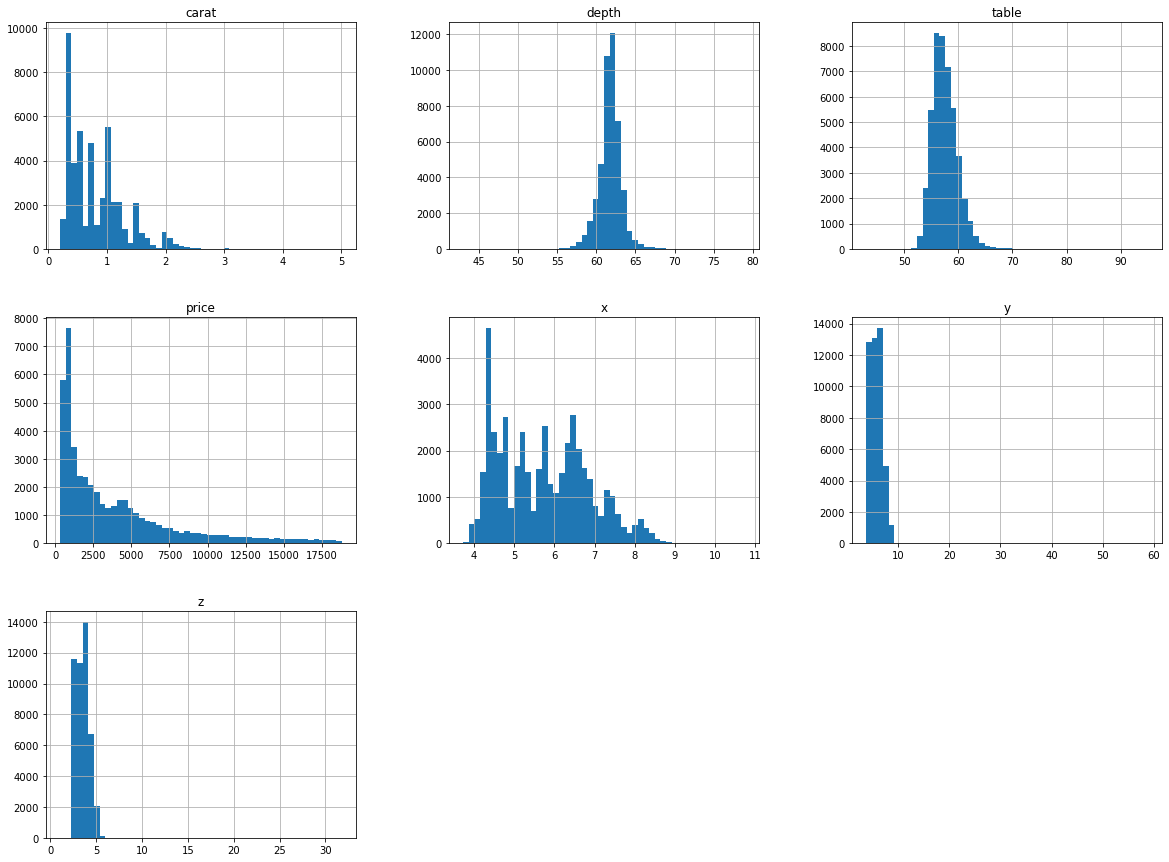

In [16]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

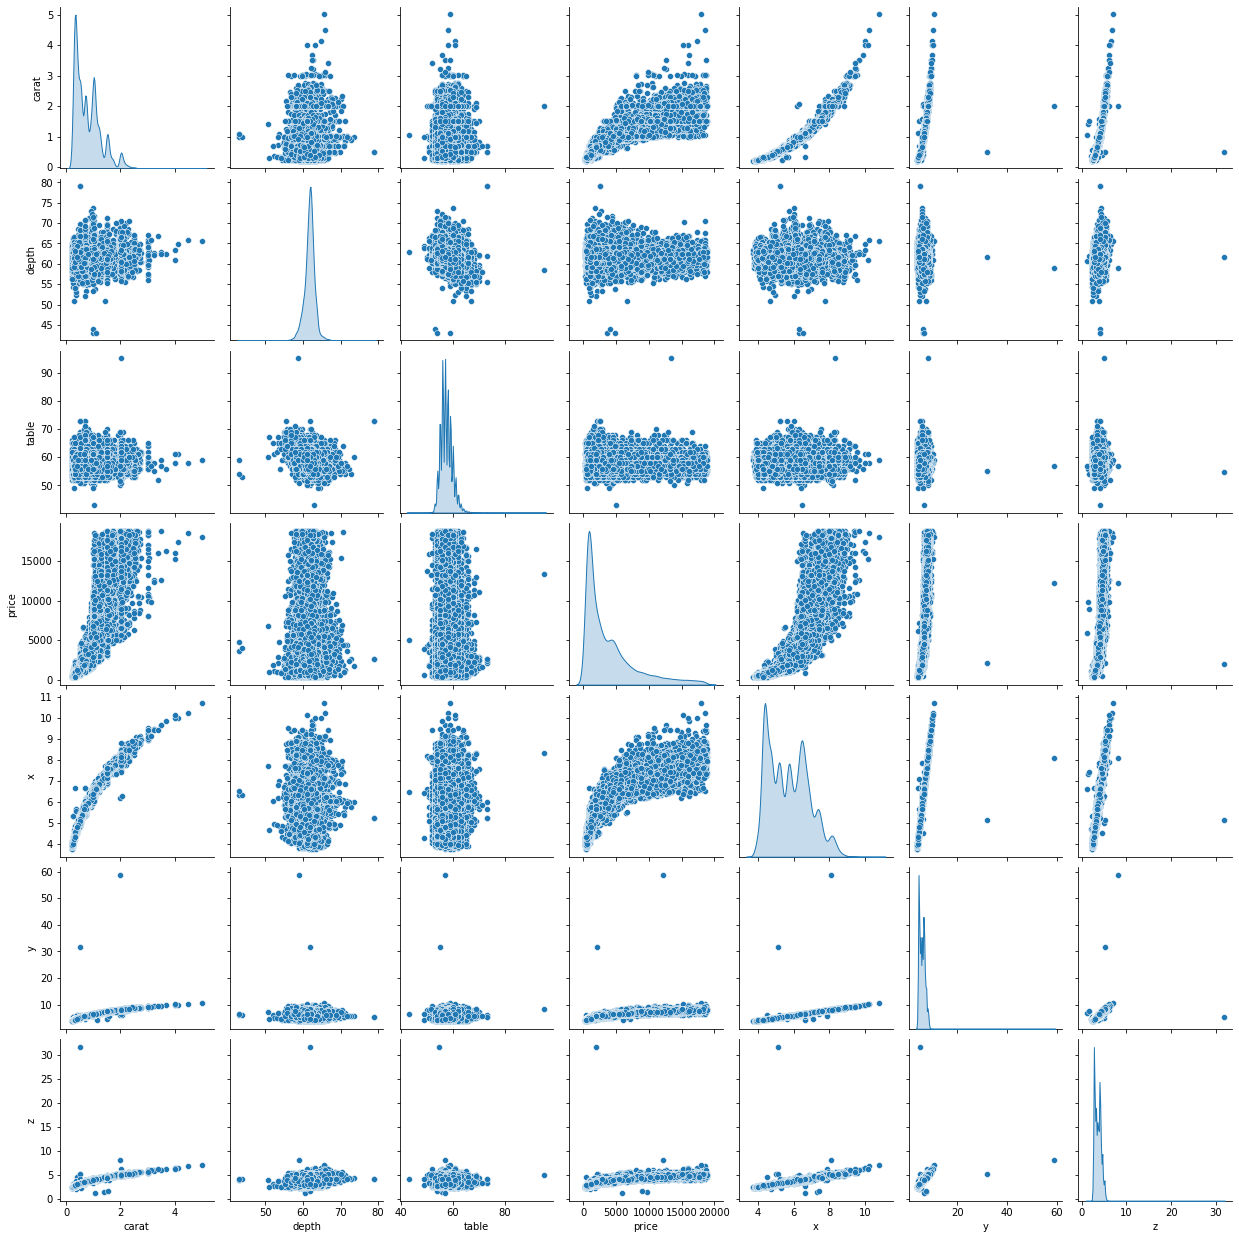

In [17]:
sns.pairplot(df , diag_kind = 'kde');

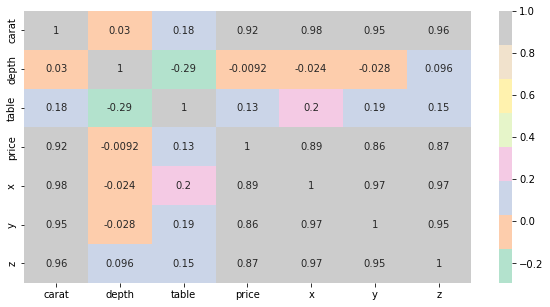

In [18]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True , cmap = 'Pastel2' );
plt.show()

# carat and price have the strongest correlation 
# after carat x,y,z have the strongest correlation 
# depth and table have the weakest correlations
# will use carat for Stratified Sampling.

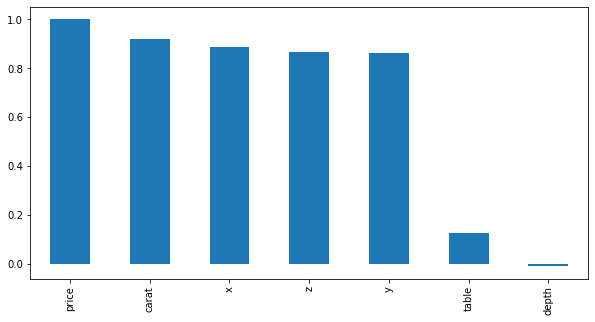

In [19]:
#test set

corr_matrix = df.corr()
plt.figure(figsize = (10,5))
corr_matrix['price'].sort_values(ascending = False).plot(kind = 'bar');


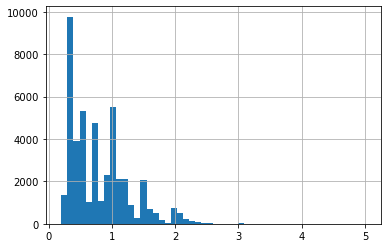

In [20]:
#taking a closer look at the carat histogram 

df["carat"].hist(bins = 50)
plt.show()


In [21]:
 #diamonds are roughly between 0.3 and 1.5 Carats based on this we can divide them in 5 categories

df["carat_cat"] = np.ceil(df["carat"] / 0.35)

#merging categories 
df["carat_cat"].where(df["carat_cat"] < 5, 5.0, inplace = True)


In [22]:
df["carat_cat"].value_counts()


2.0    13714
3.0    11347
1.0     9416
4.0     5919
5.0     5436
Name: carat_cat, dtype: int64

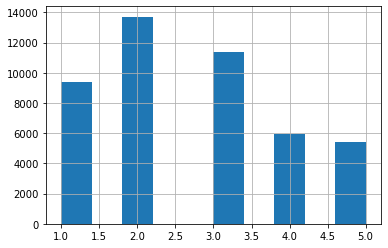

In [23]:
df["carat_cat"].hist()
plt.show()


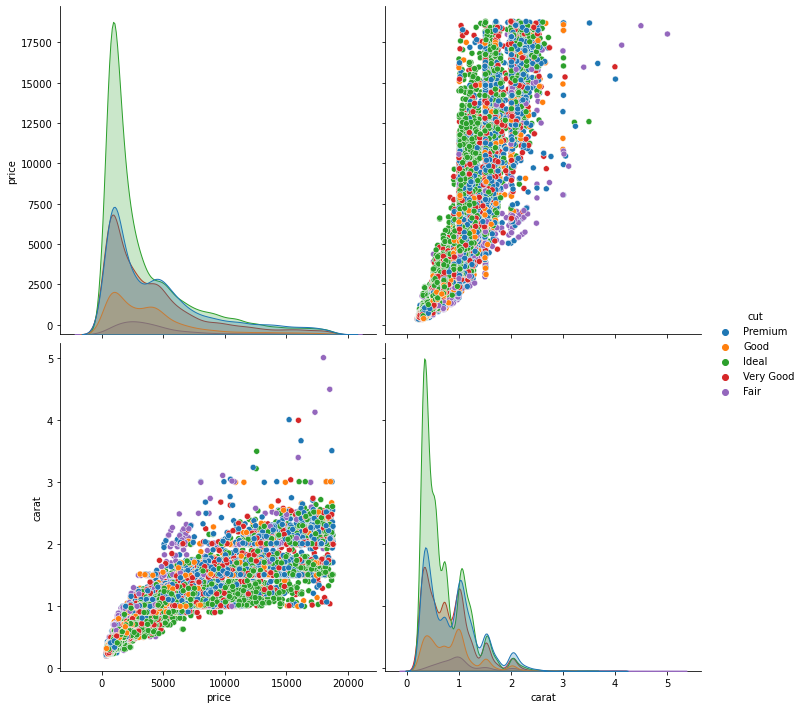

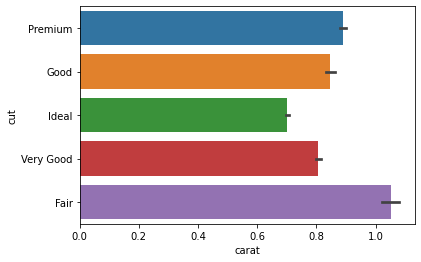

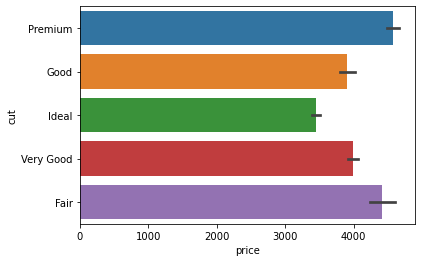

In [24]:
sns.pairplot(df[["price", "carat", "cut"]], hue = "cut", height = 5)
plt.show()
sns.barplot(x = "carat", y = "cut", data = df)
plt.show()
sns.barplot(x = "price", y = "cut", data = df)
plt.show()

# premium most expensive but less heavy 
# fair are the heaviest but second most expensive 
# ideal cheapest and the light in compar to other cuts! 


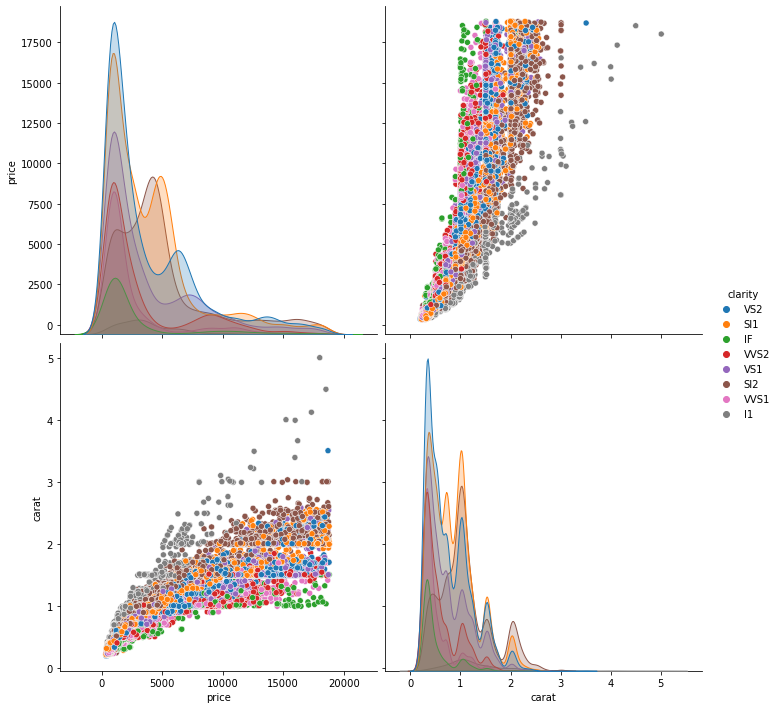

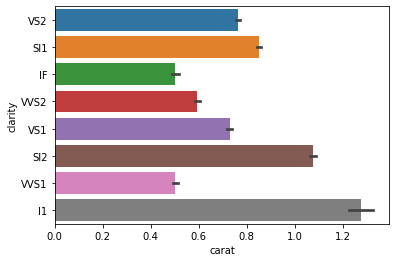

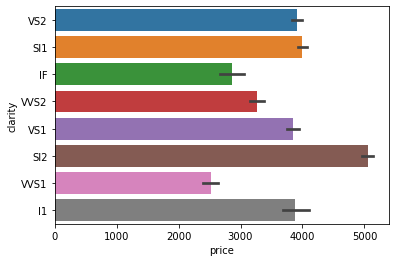

In [25]:
sns.pairplot(df[["price", "carat", "clarity"]], hue = "clarity", height = 5)
plt.show()
sns.barplot(x = "carat", y = "clarity", data = df)
plt.show()
sns.barplot(x = "price", y = "clarity", data = df)
plt.show()


# T1 doesn't hold the highest  even though it is the most priced.
# Apart from I1 if the rest stays, the price of a diamond could fairly be relative to its clarity, to some extent.

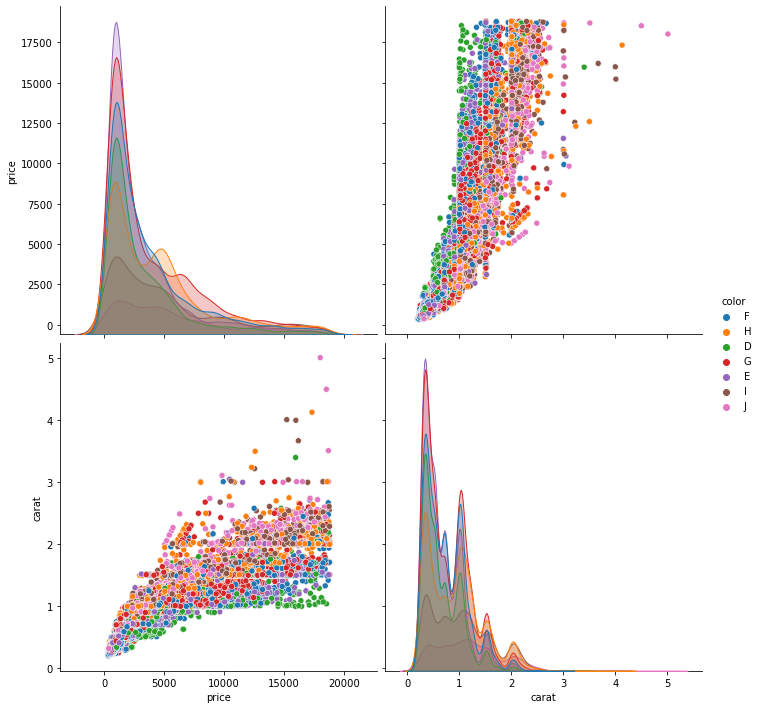

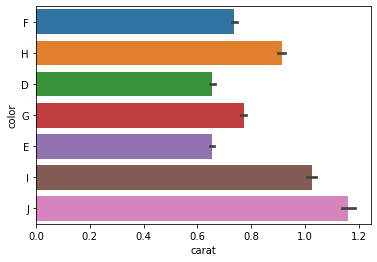

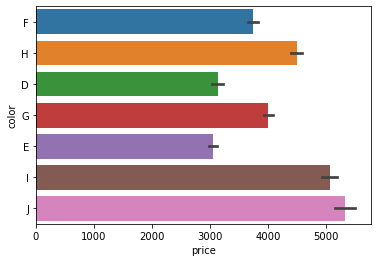

In [26]:
sns.pairplot(df[["price", "carat", "color"]], hue = "color", height = 5)
plt.show()
sns.barplot(x = "carat", y = "color", data = df)
plt.show()
sns.barplot(x = "price", y = "color", data = df)
plt.show()

# the color J is the most expensive one
# based on the 2 charts we can see that color of the diamond is very dependable to to price! 

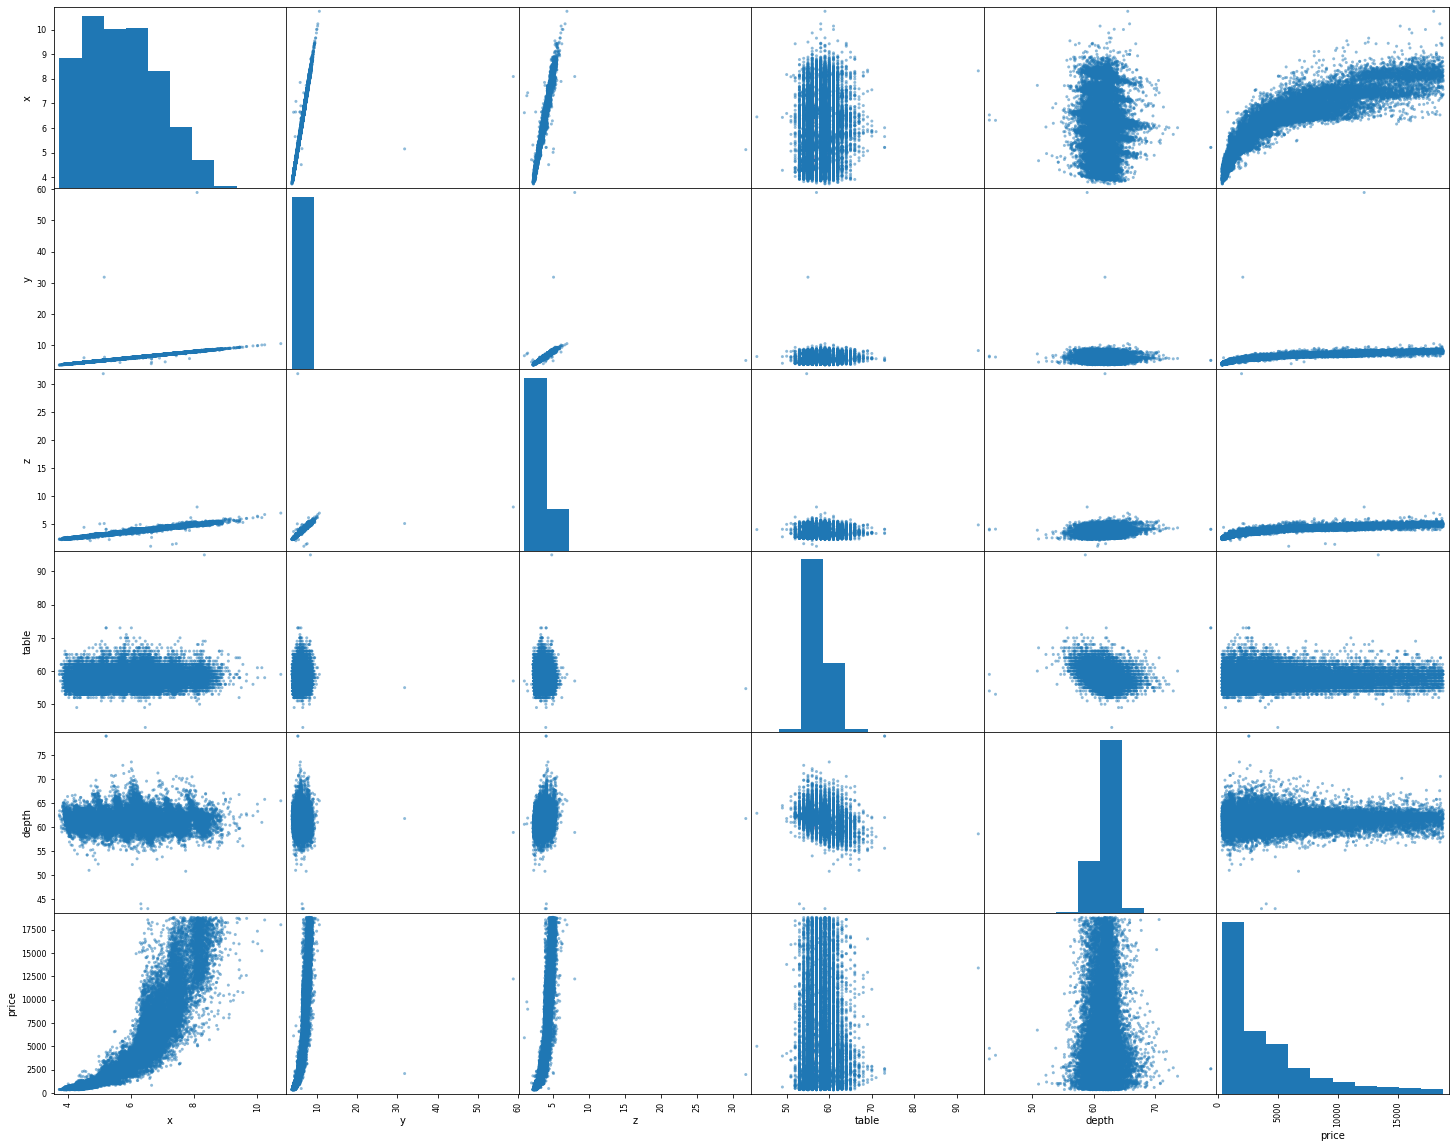

In [28]:
attributes = ["x", "y", "z", "table", "depth", "price"]
scatter_matrix(df[attributes], figsize=(25, 20))
plt.show()

# low correlation between depth and table with the price! 

In [29]:
dia=df.copy()
dia

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_cat
0,0.83,Premium,F,VS2,60.2,60.0,3495.0,6.09,6.04,3.65,3.0
1,1.25,Premium,H,SI1,60.7,58.0,5027.0,7.04,6.99,4.26,4.0
2,0.41,Premium,D,SI1,60.5,60.0,791.0,4.77,4.81,2.90,2.0
3,0.31,Good,H,VS2,63.1,57.0,489.0,4.28,4.31,2.71,1.0
4,0.30,Ideal,G,IF,62.2,55.0,844.0,4.30,4.32,2.68,1.0
...,...,...,...,...,...,...,...,...,...,...,...
45844,0.44,Premium,G,SI1,61.1,59.0,990.0,4.90,4.86,2.98,2.0
45845,1.52,Good,J,VVS2,57.9,62.0,8861.0,7.61,7.63,4.41,5.0
45846,1.00,Good,F,VS2,61.1,61.0,6841.0,6.38,6.45,3.92,3.0
45847,0.32,Good,J,SI1,63.2,56.0,374.0,4.31,4.36,2.74,1.0


In [30]:
diamonds = dia.drop("price", axis = 1)

# Set a new dataset label variable
diamond_labels = dia["price"].copy()

# Drop all the category, so we could have only numeric
diamonds_num = diamonds.drop(["cut", "color", "clarity"], axis = 1)
diamonds_num.head()

,carat,depth,table,x,y,z,carat_cat
0,0.83,60.2,60.0,6.09,6.04,3.65,3.0
1,1.25,60.7,58.0,7.04,6.99,4.26,4.0
2,0.41,60.5,60.0,4.77,4.81,2.90,2.0
3,0.31,63.1,57.0,4.28,4.31,2.71,1.0
4,0.30,62.2,55.0,4.30,4.32,2.68,1.0


In [31]:
# Perform the feature scaling on the numeric attributes of the dataset
num_scaler = StandardScaler()
diamonds_num_scaled = num_scaler.fit_transform(diamonds_num)

# Preview 
pd.DataFrame(diamonds_num_scaled).head()

#basically how our data will look during the process

,0,1,2,3,4,5,6
0,0.069583,-1.078738,1.138401,0.321745,0.267733,0.157408,0.271220
1,0.956415,-0.730641,0.243266,1.170357,1.097311,1.023053,1.060209
2,-0.817250,-0.869880,1.138401,-0.857380,-0.806352,-0.906910,-0.517770
3,-1.028400,0.940228,-0.204301,-1.295085,-1.242972,-1.176538,-1.306760
4,-1.049515,0.313653,-1.099435,-1.277219,-1.234240,-1.219110,-1.306760


In [32]:
diamonds_cat = diamonds[["cut", "color", "clarity"]]
diamonds_cat.head()

# we only the category attributes to work with here

,cut,color,clarity
0,Premium,F,VS2
1,Premium,H,SI1
2,Premium,D,SI1
3,Good,H,VS2
4,Ideal,G,IF


In [33]:
# Perform the one-hot encoding on the category attributes of the dataset
cat_encoder = OneHotEncoder()
diamonds_cat_encoded = cat_encoder.fit_transform(diamonds_cat)

# Convert the encoded categories to arrays and Preview
pd.DataFrame(diamonds_cat_encoded.toarray()).head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#we do now to to merge the numeric feature scaled attributes and the encoded category attributes

num_attribs = list(diamonds_num)
cat_attribs = ["cut", "color", "clarity"]

# Pipeline to transform our dataset
pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs), # Perform feaured scaling on numeric attributes
    ("cat", OneHotEncoder(), cat_attribs) # Perform One-Hot encoding on the category attributes
])

In [38]:
# Transformed dataset to feed the ML Algorithm
diamonds_ready = pipeline.fit_transform(diamonds)

# Preview
pd.DataFrame(diamonds_ready).head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.069583,-1.078738,1.138401,0.321745,0.267733,0.157408,0.271220,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.956415,-0.730641,0.243266,1.170357,1.097311,1.023053,1.060209,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.817250,-0.869880,1.138401,-0.857380,-0.806352,-0.906910,-0.517770,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.028400,0.940228,-0.204301,-1.295085,-1.242972,-1.176538,-1.306760,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.049515,0.313653,-1.099435,-1.277219,-1.234240,-1.219110,-1.306760,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
models_rmse = [] # Holds Models original RMSE
cvs_rmse_mean = [] # Holds the Cross Validation RMSE Mean
tests_rmse = [] # Holds the tests RMSE
tests_accuracy = [] # Holds the tests accuracy
models = []

# Remove label from test set
X_test = diamonds.drop("price", axis = 1)
# Have label stand alone
y_test = diamonds["price"].copy()

def display_model_performance(model_name, model, diamonds = diamonds_ready, labels = diamond_labels,
                              models_rmse = models_rmse, cvs_rmse_mean = cvs_rmse_mean, tests_rmse = tests_rmse,
                              tests_accuracy = tests_accuracy, pipeline = pipeline, X_test = X_test,
                              y_test = y_test, cv = True):
    # Fit dataset in model
    model.fit(diamonds, labels)
    
    # Setup predictions
    predictions = model.predict(diamonds)
    
    # Get models performance
    model_mse = mean_squared_error(labels, predictions)
    model_rmse = np.sqrt(model_mse)
    
     # Cross validation
    cv_score = cross_val_score(model, diamonds, labels, scoring = "neg_mean_squared_error", cv = 10)
    cv_rmse = np.sqrt(-cv_score)
    cv_rmse_mean = cv_rmse.mean()
    
    print("RMSE: %.4f" %model_rmse)
    models_rmse.append(model_rmse)
    
    print("CV-RMSE: %.4f" %cv_rmse_mean)
    cvs_rmse_mean.append(cv_rmse_mean)
    
    print("--- Test Performance ---")
    
    X_test_prepared = pipeline.transform(X_test)
    
    # Fit test dataset in model
    model.fit(X_test_prepared, y_test)
    
    # Setup test predictions
    test_predictions = model.predict(X_test_prepared)
    
    # Get models performance on test
    test_model_mse = mean_squared_error(y_test, test_predictions)
    test_model_rmse = np.sqrt(test_model_mse)
    print("RMSE: %.4f" %test_model_rmse)
    tests_rmse.append(test_model_rmse)
    
    # Tests accuracy
    test_accuracy = round(model.score(X_test_prepared, y_test) * 100, 2)
    print("Accuracy:", str(test_accuracy)+"%")
    tests_accuracy.append(test_accuracy)
    
    # Check how well model works on Test set by comparing prices
    start = randint(1, len(y_test))
    some_data = X_test.iloc[start:start + 7]
    some_labels = y_test.iloc[start:start + 7]
    some_data_prepared = pipeline.transform(some_data)
    print("Predictions:\t", model.predict(some_data_prepared))
    print("Labels:\t\t", list(some_labels))
    
    models.append(model_name)
    plt.scatter(diamond_labels, model.predict(diamonds_ready))
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    plt.plot(x_lim, y_lim, "k--")
    plt.show()
    
    print("------- Test -------")
    plt.scatter(y_test, model.predict(X_test_prepared))
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot(x_lim, y_lim, "k--")
    plt.show()

KeyError: "['price'] not found in axis"

In [42]:
lin_reg = LinearRegression(normalize = True)
display_model_performance("Linear Regression", lin_reg)

RMSE: 1121.2533
CV-RMSE: 1133.4998
--- Test Performance ---


NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [53]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
display_model_performance("Random Forest Regression", forest_reg)

RMSE: 240.2338
CV-RMSE: 574.3204
--- Test Performance ---


NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [78]:
compare_models = pd.DataFrame({ "Algorithms": models, "Models RMSE": models_rmse, "CV RMSE Mean": cvs_rmse_mean,
                              "Tests RMSE": tests_rmse, "Tests Accuracy": tests_accuracy })
compare_models.sort_values(by = "Tests Accuracy", ascending = False)

,Algorithms,Models RMSE,CV RMSE Mean,Tests RMSE,Tests Accuracy
1,Random Forest Regression,240.233810,574.320403,258.624953,99.58
2,Random Forest Regression,240.233810,574.320403,258.624953,99.58
0,Linear Regression,1121.253279,1133.499787,1122.365767,92.07


In [101]:
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(forest_reg, f)

In [106]:
model= lin_reg


In [103]:
new_diamond = [0.23, 5, 2, 1, 61.5, 55, 38.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [98]:
prediction = model.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

 The market price of this new diamond is $38394.78


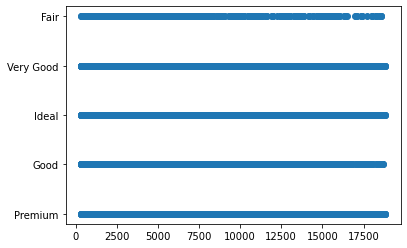

In [132]:
plt.scatter(dia['price'], dia['cut'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(dia['price'], dia['cut'], test_size=0.20)

In [133]:
# Creating the logistic regression model

# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

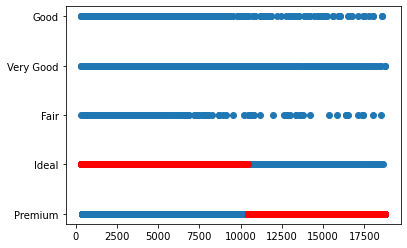

Accuracy = 0.3971855568888404


In [149]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")

In [135]:
accuracy_score(y_test,y_pred_sk)

0.3971855568888404

In [138]:
scaler=StandardScaler()

In [142]:
x_train_S=scaler.fit_transform(X_train.values.reshape(-1, 1))
x_test_s=scaler.transform(X_test.values.reshape(-1, 1))

In [152]:
lr_model.fit(x_train_S,y_train)

LogisticRegression()

In [147]:
x_train_S

array([[-0.25266404],
       [ 1.74677186],
       [-0.84906229],
       ...,
       [ 3.03901015],
       [-0.44826651],
       [ 1.44869892]])

In [145]:
y_pred2=lr_model.predict(x_test_s)

In [156]:
lr_model.score(x_test_s,y_pred_sk)

0.9981455219810189